In [1]:
using DifferentialEquations
using Plots
using Statistics
using LinearAlgebra
using DiffEqParamEstim

In [2]:
phi(a, gamma_a) = a ./ (a + gamma_a)

phi (generic function with 1 method)

In [3]:
function f_old(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(u[6],gammap).*u[1] - q.*u[1]
    du[2] = (betaE1.*phi(u[4], gammaa) + betaE2.*(1-phi(u[1], gammaB)).*phi(u[6], gammap)).*u[2] - q.*u[2]
    du[3] = (betaM1.*phi(u[4], gammaa) + betaM2.*phi(u[5], gammah)).*u[3] - q.*u[3]

    du[4] = betaa.*phi(u[6], gammap).*u[1] - q.*u[4] - (muaE.*u[2] + muaM.*u[3]).*u[4]
    du[5] = betah1.*phi(u[4], gammaa).*u[2] + betah2.*phi(u[6], gammap).*u[1] - q.*u[5] - muhM.*u[5].*u[3]
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*u[6] - (mupB.*u[1] + mupE.*u[2]).*u[6]
end


f_old (generic function with 1 method)

In [4]:
function f(du,u,p0,t)
    B, E, M, a, h, p = u
    betaa, betab, betaE1, betaE2, betah1, betah2,betah3, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q = p0

    du[1]= betab.*phi(p,gammap).*B - q.*B
    du[2] = (betaE1.*phi(a, gammaa) + betaE2.*(1-phi(B, gammaB)).*phi(p, gammap)).*E - q.*E
    du[3] = (betaM1.*phi(a, gammaa) + betaM2.*phi(h, gammah)).*M - q.*M

    du[4] = betaa.*phi(p, gammap).*B - q.*a - (muaE.*E + muaM.*M).*phi(a, gammaa)
    du[5] = betah1.*phi(a, gammaa).*E + betah2.*phi(p, gammap).*B + betah3.*(1-phi(B,gammaB)).*phi(p,gammap)*E- q.*h- muhM.*phi(h, gammah).*M
    du[6] = betap.*q.*(cos.(t)+1).^3 - q.*p - (mupB.*B + mupE.*E).*phi(p, gammap)
end

f (generic function with 1 method)

In [71]:
# betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q
u0 = [0.0004706; 0.0004706; 0.0004706; 9.7079; 7.9551; 32.061]
tspan = (0.0,1500.0);
p = [3e5, # betaa 1e7
    1.2, # betab
    0.8, # betaE1
    0.6, # betaE2
    400, #betah1 150
    33000, #betah2
    10000,  #betah3                   
    0.827, #betaM1 0.8
    0.5, #betaM2
    1000, #betap 10000
    200, #gammaa
    10, # gammaB
    150, #gammah
    400, # gammap 400
    50000, # muaE 25000
    40000, # muaM 50000
    3000, # muhM 400
    200000, #mupB
    5000000, #mupE
    0.05]

# solve the ODE
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob);#, Rosenbrock23())


In [72]:
sol(1400:1500)

t: 1400:1500
u: 101-element Vector{Vector{Float64}}:
 [0.00020953753185344554, 0.0005652175551310916, 0.0012507536294242851, 2.9548771014316966, 6.764293170875527, 15.1564898214139]
 [0.00022011892762518478, 0.00057456638192696, 0.0012376218637103625, 6.409762554611184, 7.310310708079587, 56.938617998741684]
 [0.00024196054442676636, 0.0006080572438790615, 0.0012506384847757257, 10.91091030153134, 8.371475126681618, 39.15780721337753]
 [0.00024253925679237567, 0.0006182221563948144, 0.0012739551905042717, 9.472706356798755, 8.377799325264268, 4.283339184030613]
 [0.000231426407268542, 0.0006068742464763198, 0.00128235551306795, 6.20781941607861, 7.821189199741408, 0.02000196706296904]
 [0.00022014397596408926, 0.0005886725506232609, 0.0012748496597836275, 3.976797026338679, 7.2664724759720976, 0.042090745933674414]
 [0.00021062191929988673, 0.0005688721734030156, 0.00125672309603703, 2.8365012530263707, 6.8108118227843715, 7.287475336258743]
 [0.00021467933313940667, 0.0005678914580435

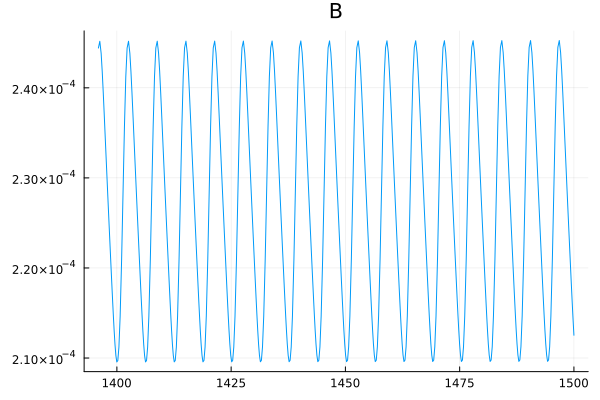

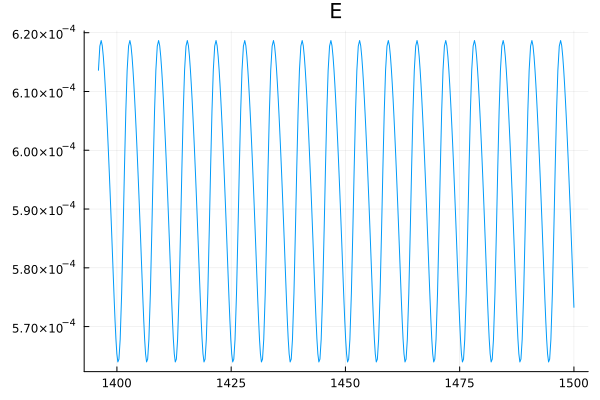

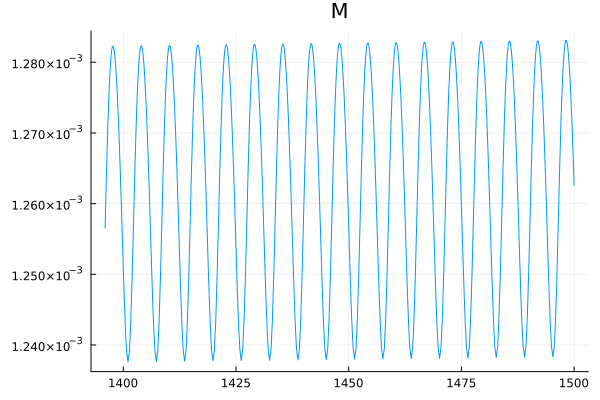

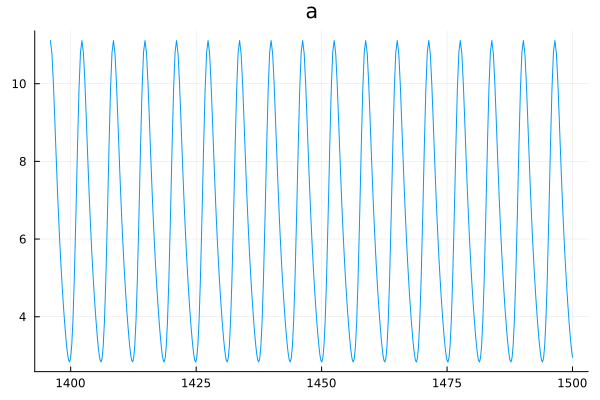

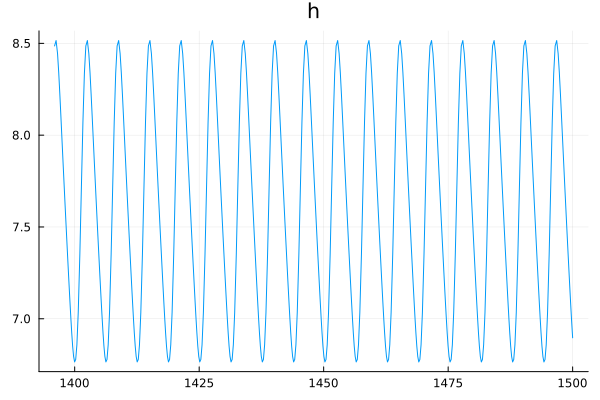

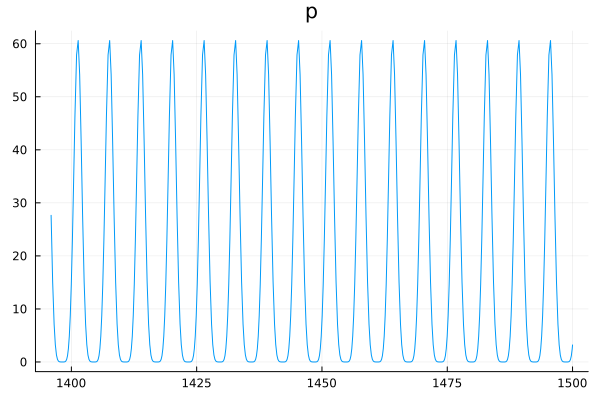

In [73]:
vars = ['B', "E", "M", "a", "h", "p"]
for i in 1:6
    d = plot(sol.t[7239-500:7239], sol[i,7239-500:7239], title = vars[i], legend = false)
    #d = plot(sol.t, sol[i,:], title = vars[i], legend = false)
    display(d)
end

In [7]:
(maximum(sol[:,500:1000], dims=2) + minimum(sol[:,500:1000], dims=2))/2

6×1 Matrix{Float64}:
  0.00022981007844805374
  0.0006017585492707844
  0.0012690155622023694
  6.875143072809616
  7.608221399147947
 30.3572751226978

In [8]:
u0

6-element Vector{Float64}:
  0.0004706
  0.0004706
  0.0004706
  9.7079
  7.9551
 32.061

In [9]:
( 6.875143072809616 -  7.9551) /  7.9551

-0.13575654953305227

# Loss function

$\text{MAPE}(x,x^\text{truth}) = $

In [74]:
function loss(truth, sol, tpts, max_t)#, truth, t_start, t_end, weight)
    """ loss computes MAPE (averaged across timepoints length(sol) - tpts  to length(sol)) and ground truth weighted by a weight vector
    truth (Vector): vector containing the ground truth
    pred (Matrix): matrix with shape (variables, timepoints)
    t_start (integer): first timepoint to pull to compute an average across time
    t_end (integer): last timepoint to pull to compute an average across time
    """
    #return sum((truth-mean(sol[:,t_start:t_end], dims=2)).^2 ./weight )#(u0-mean(sol[:,t_start:t_end], dims=2))./ weight
    s = abs(sum(truth[1:3]) - sum(center(sol[1:3,:], tpts))) ./sum(truth[1:3])
    return (s + sum((truth[4:6]-center(sol[4:6,:], tpts)) ./ truth[4:6] ))/6
end

center(sol, tpts, max_t) = (maximum(sol((max_t-tpts):max_t), dims=2) + minimum(sol((max_t-tpts):max_t), dims=2))/2

center (generic function with 2 methods)

In [75]:
size(sol[1:3,:])[2]

7239

In [76]:
center(sol, 500,1500)

6×1 Matrix{Float64}:
  0.00022725524312726148
  0.0005912903653177146
  0.001258788412937982
  6.971700034429428
  7.641394489197991
 30.453163592183607

In [77]:
loss(u0, sol, 500)

0.1414342647407252

In [80]:
truth = u0
tpts=500
max_t =1500

# looking at the APE across the 6 variables
s = abs(sum(truth[1:3]) - sum(center(sol, tpts, max_t)[1:3,:])) ./sum(truth[1:3])
s, (truth[4:6]-center(sol, tpts, max_t)[4:6,:]) ./ truth[4:6] 

(0.47140814660926345, [0.28185292036079607; 0.03943451506605942; 0.05014929065894367;;])

# Parameter Estimation

In [81]:
using Optim
using Optimization, OptimizationOptimJL

In [82]:
function optim_problem(u0, p)
    max_t = 1500.0
    tspan = (0.0,max_t)
    prob = ODEProblem(f,u0,tspan,p)
    sol = solve(prob)
    print(size(sol))
    tpts = 100
    print(loss(u0, sol, tpts, max_t))
    return loss(u0, sol, tpts, max_t)
end

optim_problem (generic function with 1 method)

In [83]:
#problem = Optimization.OptimizationProblem(optim_problem, u0, p, lb = repeat([0],length(p)), ub = repeat([10000000], length(p)) )
func = OptimizationFunction(optim_problem, Optimization.AutoForwardDiff())

(::OptimizationFunction{true, Optimization.AutoForwardDiff{nothing}, typeof(optim_problem), Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing}) (generic function with 1 method)

In [84]:
ub = [1e6, 3,3,3,1000,1e5,  1e5,3,3,1e5,1e4,1e4,1e4,1e4,1e6,1e6,1e5,1e8,1e8,1]
problem = Optimization.OptimizationProblem(func,  u0, p, lb = repeat([0],length(p)), ub = ub, length(p)))

OptimizationProblem. In-place: true
u0: 6-element Vector{Float64}:
  0.0004706
  0.0004706
  0.0004706
  9.7079
  7.9551
 32.061

In [85]:
#constrained simulated annealing

solve(problem,Optim.SAMIN()) #Optim.SimulatedAnnealing()) #

(6, 7239)0.14147458896626672(6, 73721)0.06157228803791746(6, 102)-8.929330090508699e47(6, 51645)0.22848317175375785

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /global/homes/m/maadrian/.julia/nersc/perlmutter/packages/SciMLBase/mOGJz/src/integrator_interface.jl:523


LoadError: InterruptException:

# turing

In [28]:
using Distributions
using Turing
using Random
Random.seed!(14);

In [ ]:
@model function fit(data, prob)
    # Prior distributions.
    σ ~ InverseGamma(2, 3)
    betaa
    betab
    betaE1
    betaE2
    betah1
    betah2
    betaM1
    betaM2
    betap
    gammaa
    gammaB
    gammah
    gammap
    muaE
    muaM
    muhM
    mupB
    mupE
    q 
    
    
    p = [betaa, betab, betaE1, betaE2, betah1, betah2, betaM1, betaM2, betap, gammaa, gammaB, gammah, gammap, muaE, muaM, muhM, mupB, mupE, q ]
    predicted = solve(prob, Tsit5(); p=p, saveat=0.1)

    # Observations.
    for i in 1:length(predicted)
        data[:, i] ~ MvNormal(predicted[i], σ^2 * I)
    end

    return nothing
end

model = fit(data, prob)

# Sample 3 independent chains with forward-mode automatic differentiation (the default).
chain = sample(model, NUTS(0.65), MCMCSerial(), 1000, 3; progress=false)